In [2]:
#pip install keras 

In [1]:
#pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense   

In [15]:
df=pd.read_excel("dse13-21.xlsx")
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1926,2013-02-05,4191.50,4191.50,4191.50,4191.50,-,0.0065
1927,2013-02-04,4164.62,4164.62,4164.62,4164.62,-,0.0002
1928,2013-02-03,4163.82,4163.82,4163.82,4163.82,-,0.0067
1929,2013-01-31,4136.30,4136.30,4136.30,4136.30,-,0.0023
1930,2013-01-30,4126.75,4126.75,4126.75,4126.75,-,-0.0067


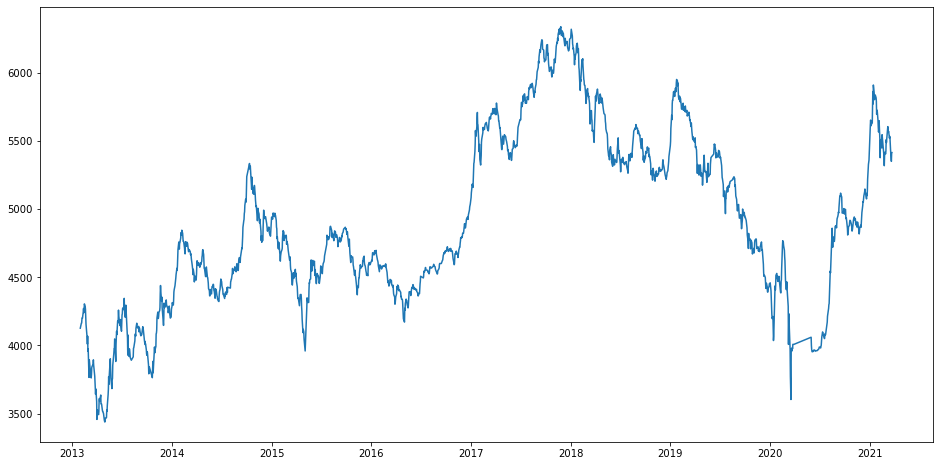

In [16]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Price"],label='Close Price history')

In [17]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Price'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Price"][i]=data["Price"][i]
new_dataset

,Date,Price
0,2013-01-30 00:00:00,4126.75
1,2013-01-31 00:00:00,4136.3
2,2013-02-03 00:00:00,4163.82
3,2013-02-04 00:00:00,4164.62
4,2013-02-05 00:00:00,4191.5
...,...,...
1926,2021-03-16 00:00:00,5516.4
1927,2021-03-18 00:00:00,5434.69
1928,2021-03-21 00:00:00,5349.77
1929,2021-03-22 00:00:00,5412.19


## show error if more than one times run

In [18]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

final_dataset=new_dataset.values

train_data=final_dataset[0:1500,:]
valid_data=final_dataset[1500:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [21]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [27]:
model = Sequential()
model.add(TimeDistributed(Conv1D(50, 1, activation='relu'), input_shape=(None,2,1)))
model.add(TimeDistributed(MaxPooling1D()))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_5 (TimeDist (None, None, 2, 50)       100       
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 1, 50)       0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 50)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 20,351
Trainable params: 20,351
Non-trainable params: 0
_________________________________________________________________


In [6]:
lstm_model=Sequential()
lstm_model.add(LSTM(50, activation='relu', return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(50))
#lstm_model.add(Dropout(0.1))
#lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1440, 50)          10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train_data,y_train_data,epochs=1,verbose=2)

ValueError: in user code:

    C:\Users\rokan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\rokan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\rokan\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\rokan\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\rokan\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\rokan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\rokan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\rokan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\rokan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:219 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: (32, 60, 1)


In [7]:
# COMPILE THE MODEL

lstm_model.compile(loss='mean_squared_error',optimizer='adam')

In [8]:
#  FIT THE MODEL
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

1440/1440 - 39s - loss: 0.0036


In [9]:
# Take a sample of a dataset to make stock price predictions using the LSTM model

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)
closing_price

array([[5438.11  ],
       [5417.7124],
       [5407.569 ],
       [5404.369 ],
       [5399.0703],
       [5391.2783],
       [5385.4434],
       [5378.1416],
       [5364.303 ],
       [5351.0894],
       [5347.9097],
       [5361.6562],
       [5377.9087],
       [5388.858 ],
       [5393.802 ],
       [5394.88  ],
       [5393.123 ],
       [5387.0186],
       [5375.9204],
       [5360.834 ],
       [5348.589 ],
       [5349.8984],
       [5352.359 ],
       [5351.6606],
       [5350.807 ],
       [5349.7476],
       [5348.941 ],
       [5348.3574],
       [5355.7593],
       [5369.337 ],
       [5387.559 ],
       [5409.17  ],
       [5433.3877],
       [5461.1113],
       [5487.012 ],
       [5509.599 ],
       [5523.061 ],
       [5523.9624],
       [5520.241 ],
       [5515.0923],
       [5507.921 ],
       [5499.252 ],
       [5491.087 ],
       [5483.531 ],
       [5480.446 ],
       [5482.316 ],
       [5486.066 ],
       [5486.842 ],
       [5484.756 ],
       [5482.2173],


In [10]:
# Save the LSTM model
lstm_model.save("saved_model.h45")

INFO:tensorflow:Assets written to: saved_model.h45\assets


INFO:tensorflow:Assets written to: saved_model.h45\assets


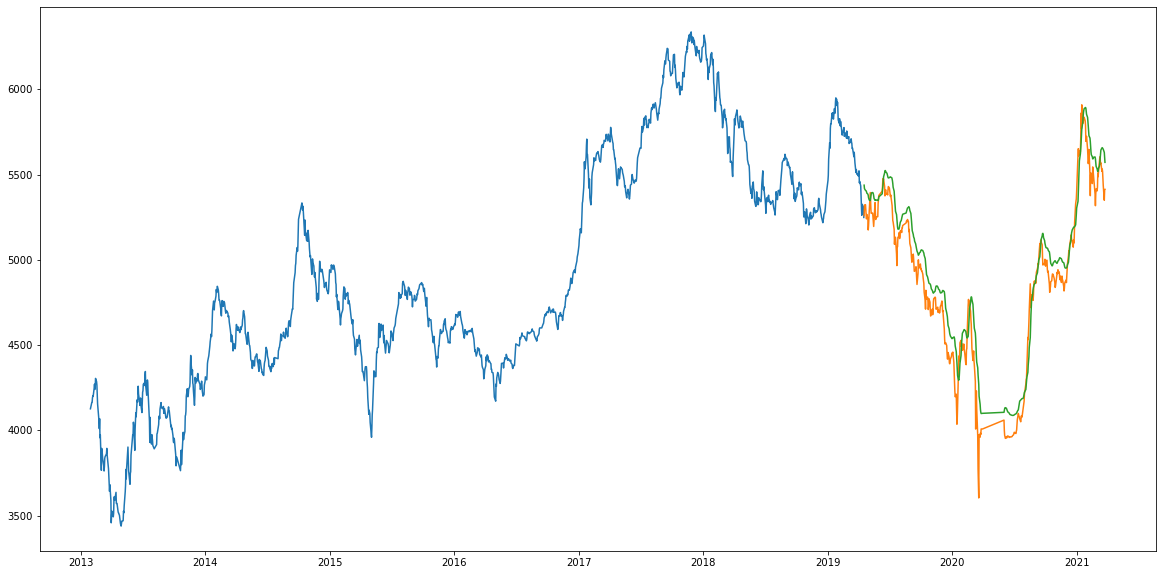

In [11]:
# Visualize the predicted stock costs with actual stock costs
train_data=new_dataset.iloc[:1500]
valid_data=new_dataset.iloc[1500:]
valid_data['Predictions']=closing_price
plt.plot(train_data["Price"])
plt.plot(valid_data[['Price',"Predictions"]])

In [15]:
# You can observe that LSTM has predicted stocks almost similar 
# to actual stocks.

In [12]:
train_data

,Price
Date,
2013-01-30,4126.75
2013-01-31,4136.3
2013-02-03,4163.82
2013-02-04,4164.62
2013-02-05,4191.5
...,...
2019-04-09,5318.75
2019-04-10,5261.6
2019-04-11,5326.39


In [13]:
valid_data

,Price,Predictions
Date,,
2019-04-17,5259.41,5438.109863
2019-04-18,5321.41,5417.712402
2019-04-21,5323.73,5407.568848
2019-04-23,5260.85,5404.369141
2019-04-24,5240.36,5399.070312
...,...,...
2021-03-16,5516.4,5655.435059
2021-03-18,5434.69,5648.317383
2021-03-21,5349.77,5630.519531


In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(valid_data['Price'], valid_data['Predictions']))
rms

146.82481966797587